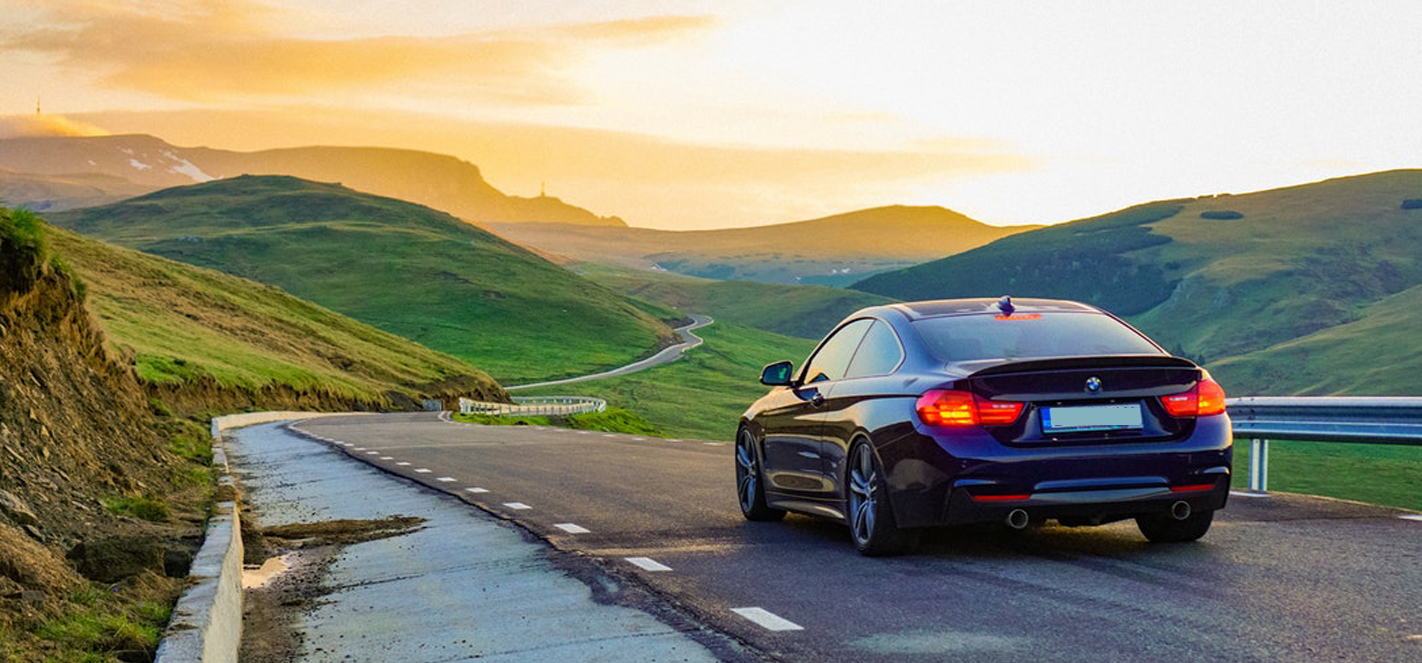


## Business Problem
_______________________________________________________________________________________________________________________________

Used Car Lot TM is a newly established local business in the United States.

They have advised that they are seeking to understand what are the top make and model of cars that sold the most in the last year nationally. From this analysis we intend on building a multiple linear regression model to predict what brand names will make the list.

The car lot intends on using this information to ensure their buisness objectives, marketing, and sales teams' concentrations are on point.

In addition, the information obtained will also be used to educate their staff and sales team. When approached by consumers looking to buy a used car, facts and statistics may assist all those involved. 


# Step 1: Read the dataset and inspect its columns and 5-point statistics

In [36]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

In [37]:
#Import data set
df = pd.read_csv('data\\USA_cars_datasets.csv')

In [35]:
#Data info
df.info

<bound method DataFrame.info of       price      brand    model  year   title_status   mileage   color  \
0      6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1      2899       ford       se  2011  clean vehicle  190552.0  silver   
2      5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3     25000       ford     door  2014  clean vehicle   64146.0    blue   
4     27700  chevrolet     1500  2018  clean vehicle    6654.0     red   
...     ...        ...      ...   ...            ...       ...     ...   
2494   7800     nissan    versa  2019  clean vehicle   23609.0     red   
2495   9200     nissan    versa  2018  clean vehicle   34553.0  silver   
2496   9200     nissan    versa  2018  clean vehicle   31594.0  silver   
2497   9200     nissan    versa  2018  clean vehicle   32557.0   black   
2498   9200     nissan    versa  2018  clean vehicle   31371.0  silver   

           state  
0     new jersey  
1      tennessee  
2        georgia  
3  

In [39]:
#remove null values 
df.dropna()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [40]:
print(list(df.columns))

['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition']


In [41]:
#obtain stats details
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499,2499,2499,2499,2499
mean,1249,"18,767.67","2,016.71","52,298.69","167,691,389.06"
std,721.54,"12,116.09",3.44,"59,705.52","203,877.21"
min,0,0,1973,0,159348797
25%,624.50,10200,2016,"21,466.50",167625331
50%,1249,16900,2018,35365,167745058
75%,"1,873.50","25,555.50",2019,"63,472.50",167779772
max,2498,84900,2020,1017936,167805500


In [42]:
df.nunique()

Unnamed: 0      2499
price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

In [45]:
#Review specific correlated value estimated
df.corr()

,Unnamed: 0,price,year,mileage,lot
Unnamed: 0,1,0.10,0.24,-0.13,0.01
price,0.10,1,0.42,-0.40,0.16
year,0.24,0.42,1,-0.59,0.16
mileage,-0.13,-0.40,-0.59,1,-0.13
lot,0.01,0.16,0.16,-0.13,1


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,20), sharey=True)

categoricals = ['brand', 'model', 'title_status', 'color']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

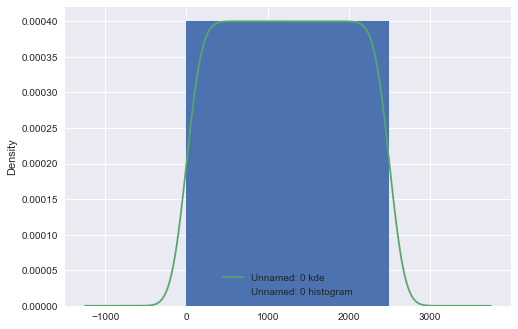

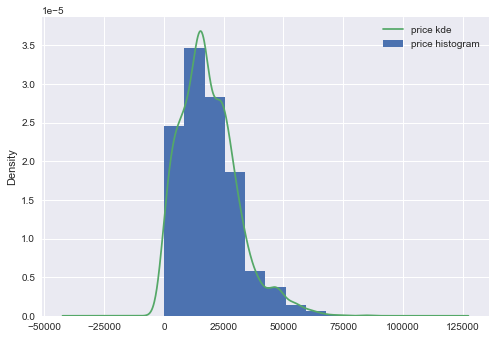

TypeError: no numeric data to plot

In [46]:
# For all the variables, check distribution by creating a histogram with kde
for column in df:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

# Create dummy variables for your four categorical features
dummies = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=True)
df_preprocessed = df.drop(categoricals, axis=1)
df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)
df_preprocessed.head()

In [26]:
df.corr()

,price,year,mileage
price,1.000000,0.418274,-0.400838
year,0.418274,1.000000,-0.594686
mileage,-0.400838,-0.594686,1.000000


In [29]:
median_price = df['price'].median()
df['price'] = df['price'].astype(int)
df['price'].replace(0,median_price ,inplace=True)

In [32]:
brand_of_car = df.groupby('brand')['model'].count().reset_index().sort_values('model',ascending = False).head(10)
brand_of_car = brand_of_car.rename(columns = {'model':'count'})
fig = df(brand_of_car, x='brand', y='count', color='count')
fig.show()

#You can reach a lot of information about car brand and their count 

TypeError: 'DataFrame' object is not callable

In [10]:
#drop unnecessary column data
df.drop(['Unnamed: 0', 'vin', 'lot', 'country', 'condition'], axis=1, inplace=True)

In [ ]:
origin = ['USA', 'EU', 'EU', 'ASIA','USA', 'EU', 'EU', 'ASIA', 'ASIA', 'USA']
origin_series = pd.Series(origin)

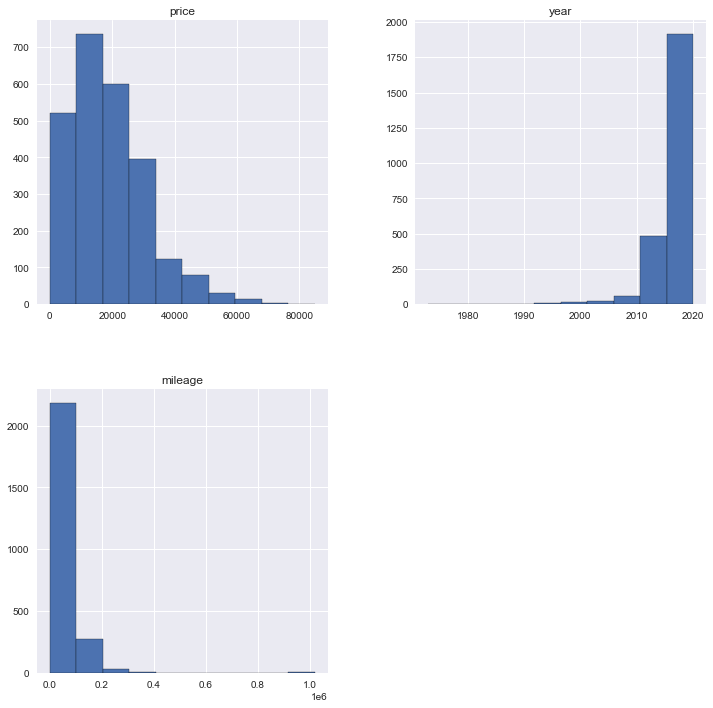

In [19]:
#distribution visualization
df.hist(figsize=(12,12), edgecolor = 'black');

KeyError: 'mpg'

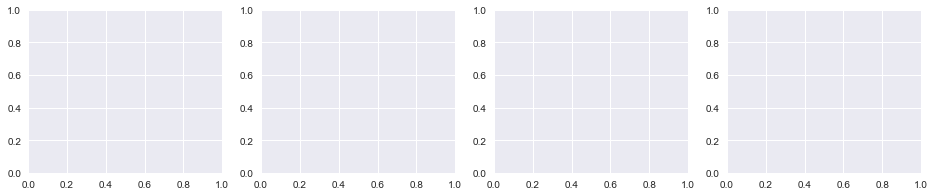

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['price', 'year', 'mileage'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

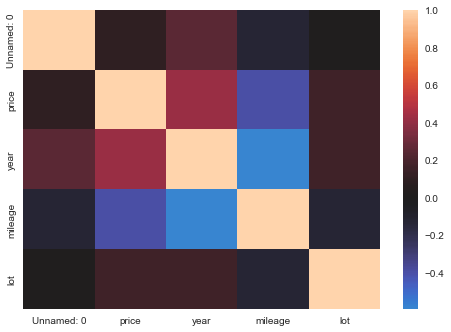

In [8]:
#creating a heatmap to learn even more 
import seaborn as sns
sns.heatmap(df.corr(), center=0);

In [ ]:
df.head()

In [ ]:
from collections import Counter
def return_counter(data_frame, column_name, limit):
  print(dict(Counter(data_frame[column_name]
  .values).most_common(limit)))

In [ ]:
return_counter(df, 'brand', 5)

In [ ]:
#create the column data
continuous = ['price', 'mileage', 'year']
categoricals = ['brand', 'model', 'title_status', 'color','state']
df_cont = df[continuous]

In [ ]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean, 'std in {}'.format(numerical_column): std})
    df.sort_values('mean {}'.format(numerical_column), inplace = True, ascending = False)
    df.dropna(inplace = True)
    return df

In [ ]:
stats = return_statistics(df, 'brand', 'price')
print(stats.head(15))

In [ ]:
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

In [ ]:
df.fillna(-99999, inplace=True)

In [ ]:
print(dict(Counter(df['brand']).most_common(5)))

In [ ]:
df_d1 = df[df['color'] =='black']
print(set(df_d1['brand']))

In [ ]:
print(dict(Counter(df['state']).most_common(5)))

In [ ]:
print(dict(Counter(df_d1['brand']).most_common(5)))

In [ ]:
import matplotlib.pyplot as plt
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    import seaborn as sns
    from collections import Counter
    keys = []
    for i in dict(Counter(df[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    df_new = df[df[categorical_column].isin(keys)]
    sns.set()
    sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column])
    plt.show()

In [ ]:
get_boxplot_of_categories(df, 'brand', 'price', 5)

In [ ]:
#review null values 
df.isnull().sum()

In [ ]:
#checking to see if there are unique values 
df.nunique()

In [ ]:
#Continuous data visualisations
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(26,26))

for xcol, ax in zip(['brand', 'model', 'color'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [ ]:
#Useful histogram to view any variances and understand the data set
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (18,8))
ax = fig.gca()
df.hist(ax = ax);

In [ ]:
# log features declared with lamda values to convert int to floats 
log_names = [f'{column}_log' for column in df_cont.columns]
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df_log = np.log(df_cont)
df_log.columns = log_names

In [ ]:
# normalize continued features
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log.apply(normalize)

In [ ]:
#creating duimmy data
pd.get_dummies(df)

In [ ]:
#declaring categorical dummy data 
df_ohe = pd.get_dummies(df[categoricals], drop_first=True)

In [ ]:
#combining two variables

preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)
preprocessed.head()

In [ ]:
# one hot encode (ohe)categoricals
df_ohe = pd.get_dummies(df[categoricals], prefix=categoricals[0], drop_first=True)
preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)
X = preprocessed.drop('year_log', axis=1)
y = preprocessed['year_log']

In [ ]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# A brief preview of train-test split to create test training data and dummy data set
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
#apply model to the train set 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
#apply model to the train set 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)


In [ ]:
#Continuous data visualisations
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_lot', 'sqft_living', 'grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')